<a href="https://colab.research.google.com/github/lualua0909/DeepLearning-LDS8/blob/main/Week_1/Ex1_ANN_Cars_activation_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Cho dữ liệu cars.csv <br/> Áp dụng ANN để dự đoán giá trị của một "potential car sale**

In [17]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [18]:
print(tf.__version__)
print(keras.__version__)

2.6.0
2.6.0


In [19]:
# Load Dataset
#Variables
dataset=pd.read_csv("https://raw.githubusercontent.com/lualua0909/DeepLearning-LDS8/main/Data/cars.csv", delimiter=",", header=None)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       963 non-null    int64
 1   1       963 non-null    int64
 2   2       963 non-null    int64
 3   3       963 non-null    int64
 4   4       963 non-null    int64
 5   5       963 non-null    int64
dtypes: int64(6)
memory usage: 45.3 KB


In [20]:
dataset.head()

,0,1,2,3,4,5
0,28,0,23,0,4099,620
1,26,0,27,0,2677,1792
2,30,1,58,41576,6215,27754
3,26,1,25,43172,7626,28256
4,20,1,17,6979,8071,4438


In [21]:
dataset.describe()

,0,1,2,3,4,5
count,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000
mean,37.971963,0.512980,27.704050,14109.004154,6176.047767,11689.860852
std,12.290838,0.500091,13.378181,18273.702481,3260.670142,8986.896921
min,19.000000,0.000000,10.000000,0.000000,0.000000,500.000000
25%,27.000000,0.000000,20.000000,1475.000000,3506.500000,3554.000000
50%,37.000000,1.000000,25.000000,6236.000000,6360.000000,9130.000000
75%,49.000000,1.000000,32.000000,16686.000000,8649.500000,19245.000000
max,60.000000,1.000000,97.000000,59770.000000,11970.000000,29926.000000


In [22]:
x=dataset.iloc[:,0:5]
y=dataset.iloc[:,5]
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [23]:
y=np.reshape(np.array(y), (-1,1))
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
# print(scaler.fit(x))
# print(scaler.fit(y))

In [24]:
xscale=scaler_x.fit_transform(x)
yscale=scaler_y.fit_transform(y)
#print(xscale)
#print(yscale)

In [25]:
# Keras Model Configuration: Neural Network API
model = Sequential()
model.add(Dense(3, input_dim=5, kernel_initializer='normal', activation='relu'))
# model.add(Dense(12, input_dim=5, kernel_initializer='normal', activation='relu
# tham số đầu tiên là units: là số nguyên, nodes của đầu ra
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 4         
Total params: 34
Trainable params: 34
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [27]:
# fit model
history = model.fit(xscale, yscale, epochs=150,
batch_size=32,
verbose=0,
validation_split=0.2)

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


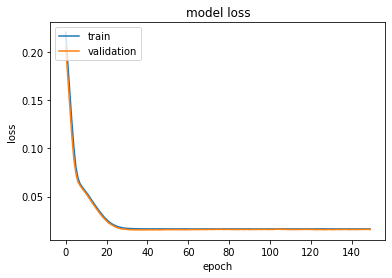

In [28]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [29]:
# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(xscale, yscale)
print('loss, mse, mae:', results)


# Evaluate on test data
31/31 [==============================] - 0s 1ms/step - loss: 0.0162 - mse: 0.0162 - mae: 0.0971
loss, mse, mae: [0.016195854172110558, 0.016195854172110558, 0.0971406102180481]


In [30]:
# Predictions
Xnew = np.array([[40, 0, 26, 9000, 8000]])
X_new = scaler_x.transform(Xnew)
ynew=model.predict(X_new)
y_new = scaler_y.inverse_transform(ynew)
print("X=%s, Predicted=%s" % (Xnew[0], y_new[0]))

X=[  40    0   26 9000 8000], Predicted=[11743.093]
